In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as grp
from folium import plugins
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy_GDP per Capita,Family,Health_Life_Expectancy,Freedom,Trust Government_Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy_GDP per Capita,158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health_Life_Expectancy,158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust Government_Corruption,158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [4]:
df.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy_GDP per Capita,Family,Health_Life_Expectancy,Freedom,Trust Government_Corruption,Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Country                        0
Region                         0
Happiness Rank                 0
Happiness Score                0
Standard Error                 0
Economy_GDP per Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Trust Government_Corruption    0
Generosity                     0
Dystopia Residual              0
dtype: int64

There are no Null Valuue available in data

In [6]:
df.shape

(158, 12)

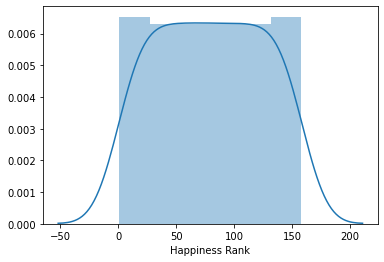

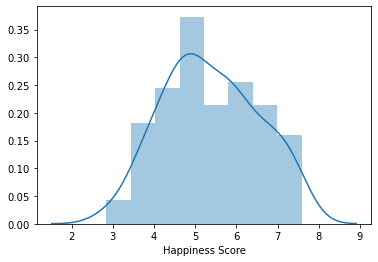

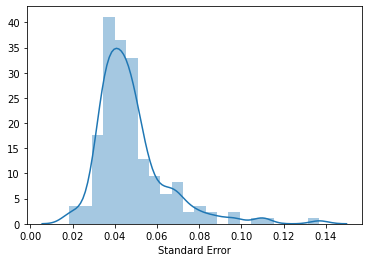

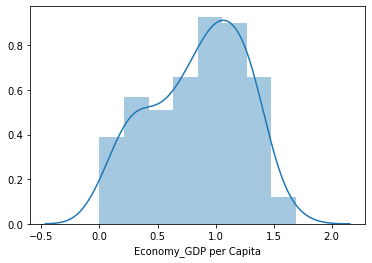

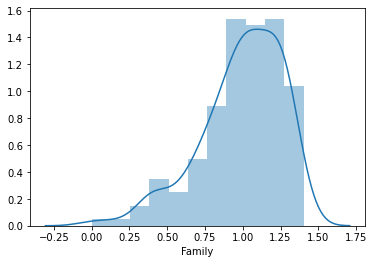

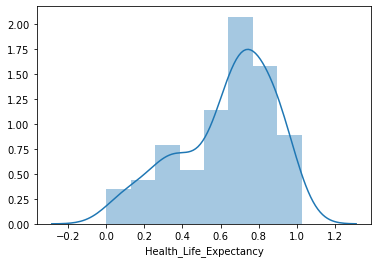

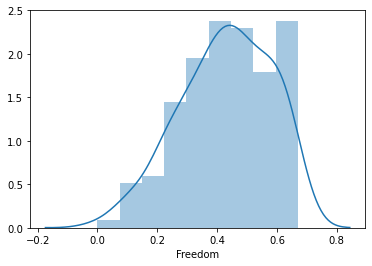

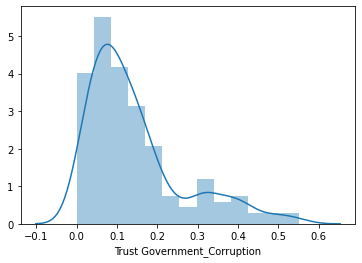

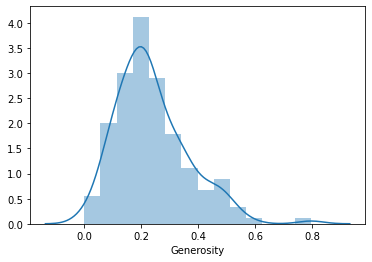

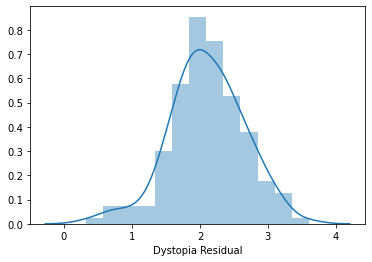

In [7]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

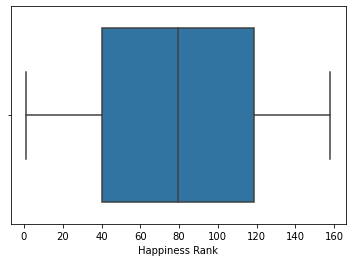

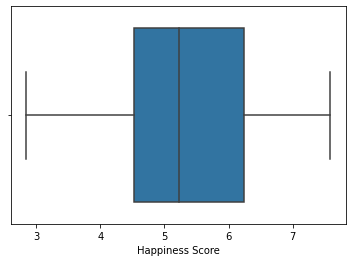

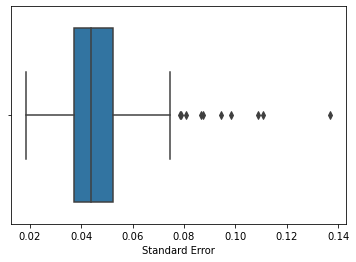

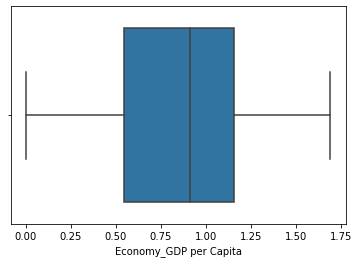

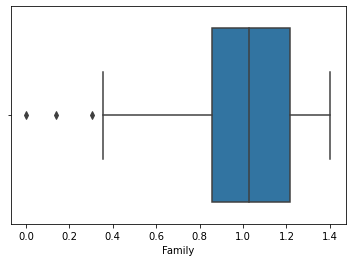

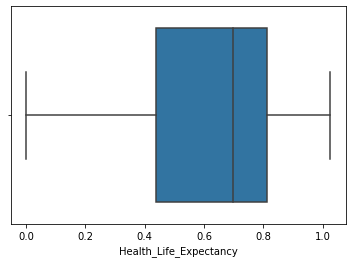

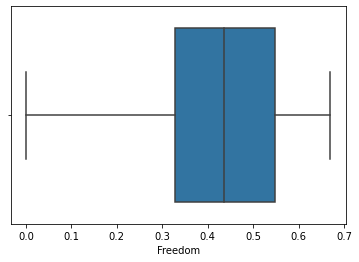

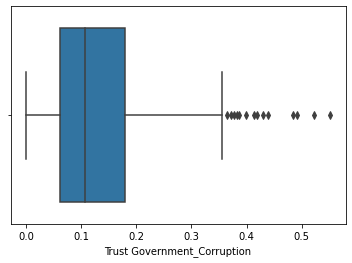

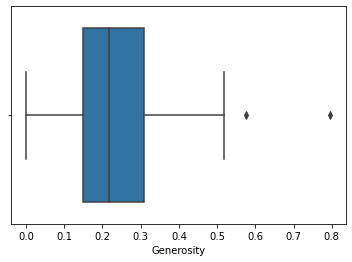

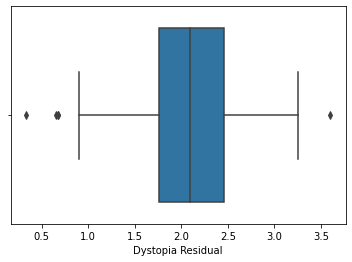

In [8]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

In above distplot and boxplot we can see the graphical representaion of all attributes also we can see the outliers in given data

In [9]:
df.Country.value_counts()

Lebanon         1
Rwanda          1
Philippines     1
Latvia          1
Chile           1
               ..
Switzerland     1
Ghana           1
Serbia          1
Bahrain         1
Turkmenistan    1
Name: Country, Length: 158, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

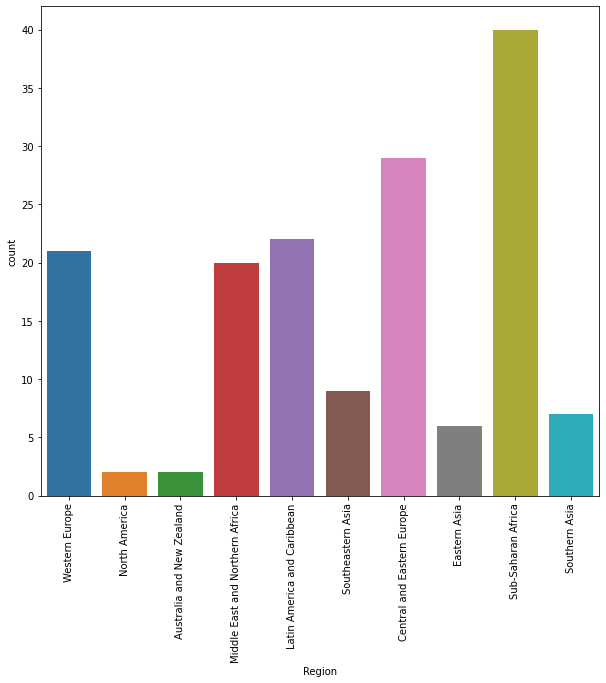

In [10]:
plt.figure(figsize=(10,9))
sns.countplot(df.Region)
plt.xticks(rotation=90)

Here we can  see that region count and here we can see that maxximum country in this data come from Sub-Saharan Africa followed by Central and  Eastern Europe

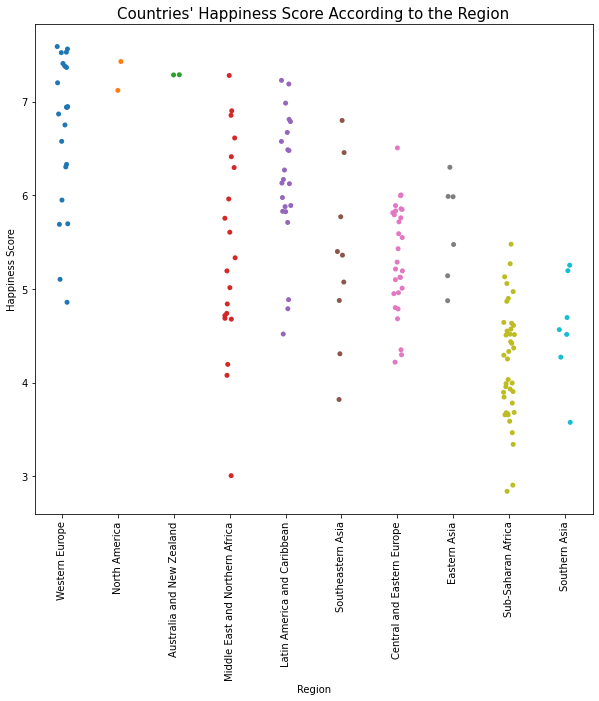

In [11]:
plt.figure(figsize=(10,9))
x = sns.stripplot(x = "Region", y = "Happiness Score", data = df, jitter = True)
plt.xticks(rotation = 90)
plt.title("Countries' Happiness Score According to the Region", fontsize = 15)
plt.show()

Here we can see the relation between Region and Happiness Score 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157],
 <a

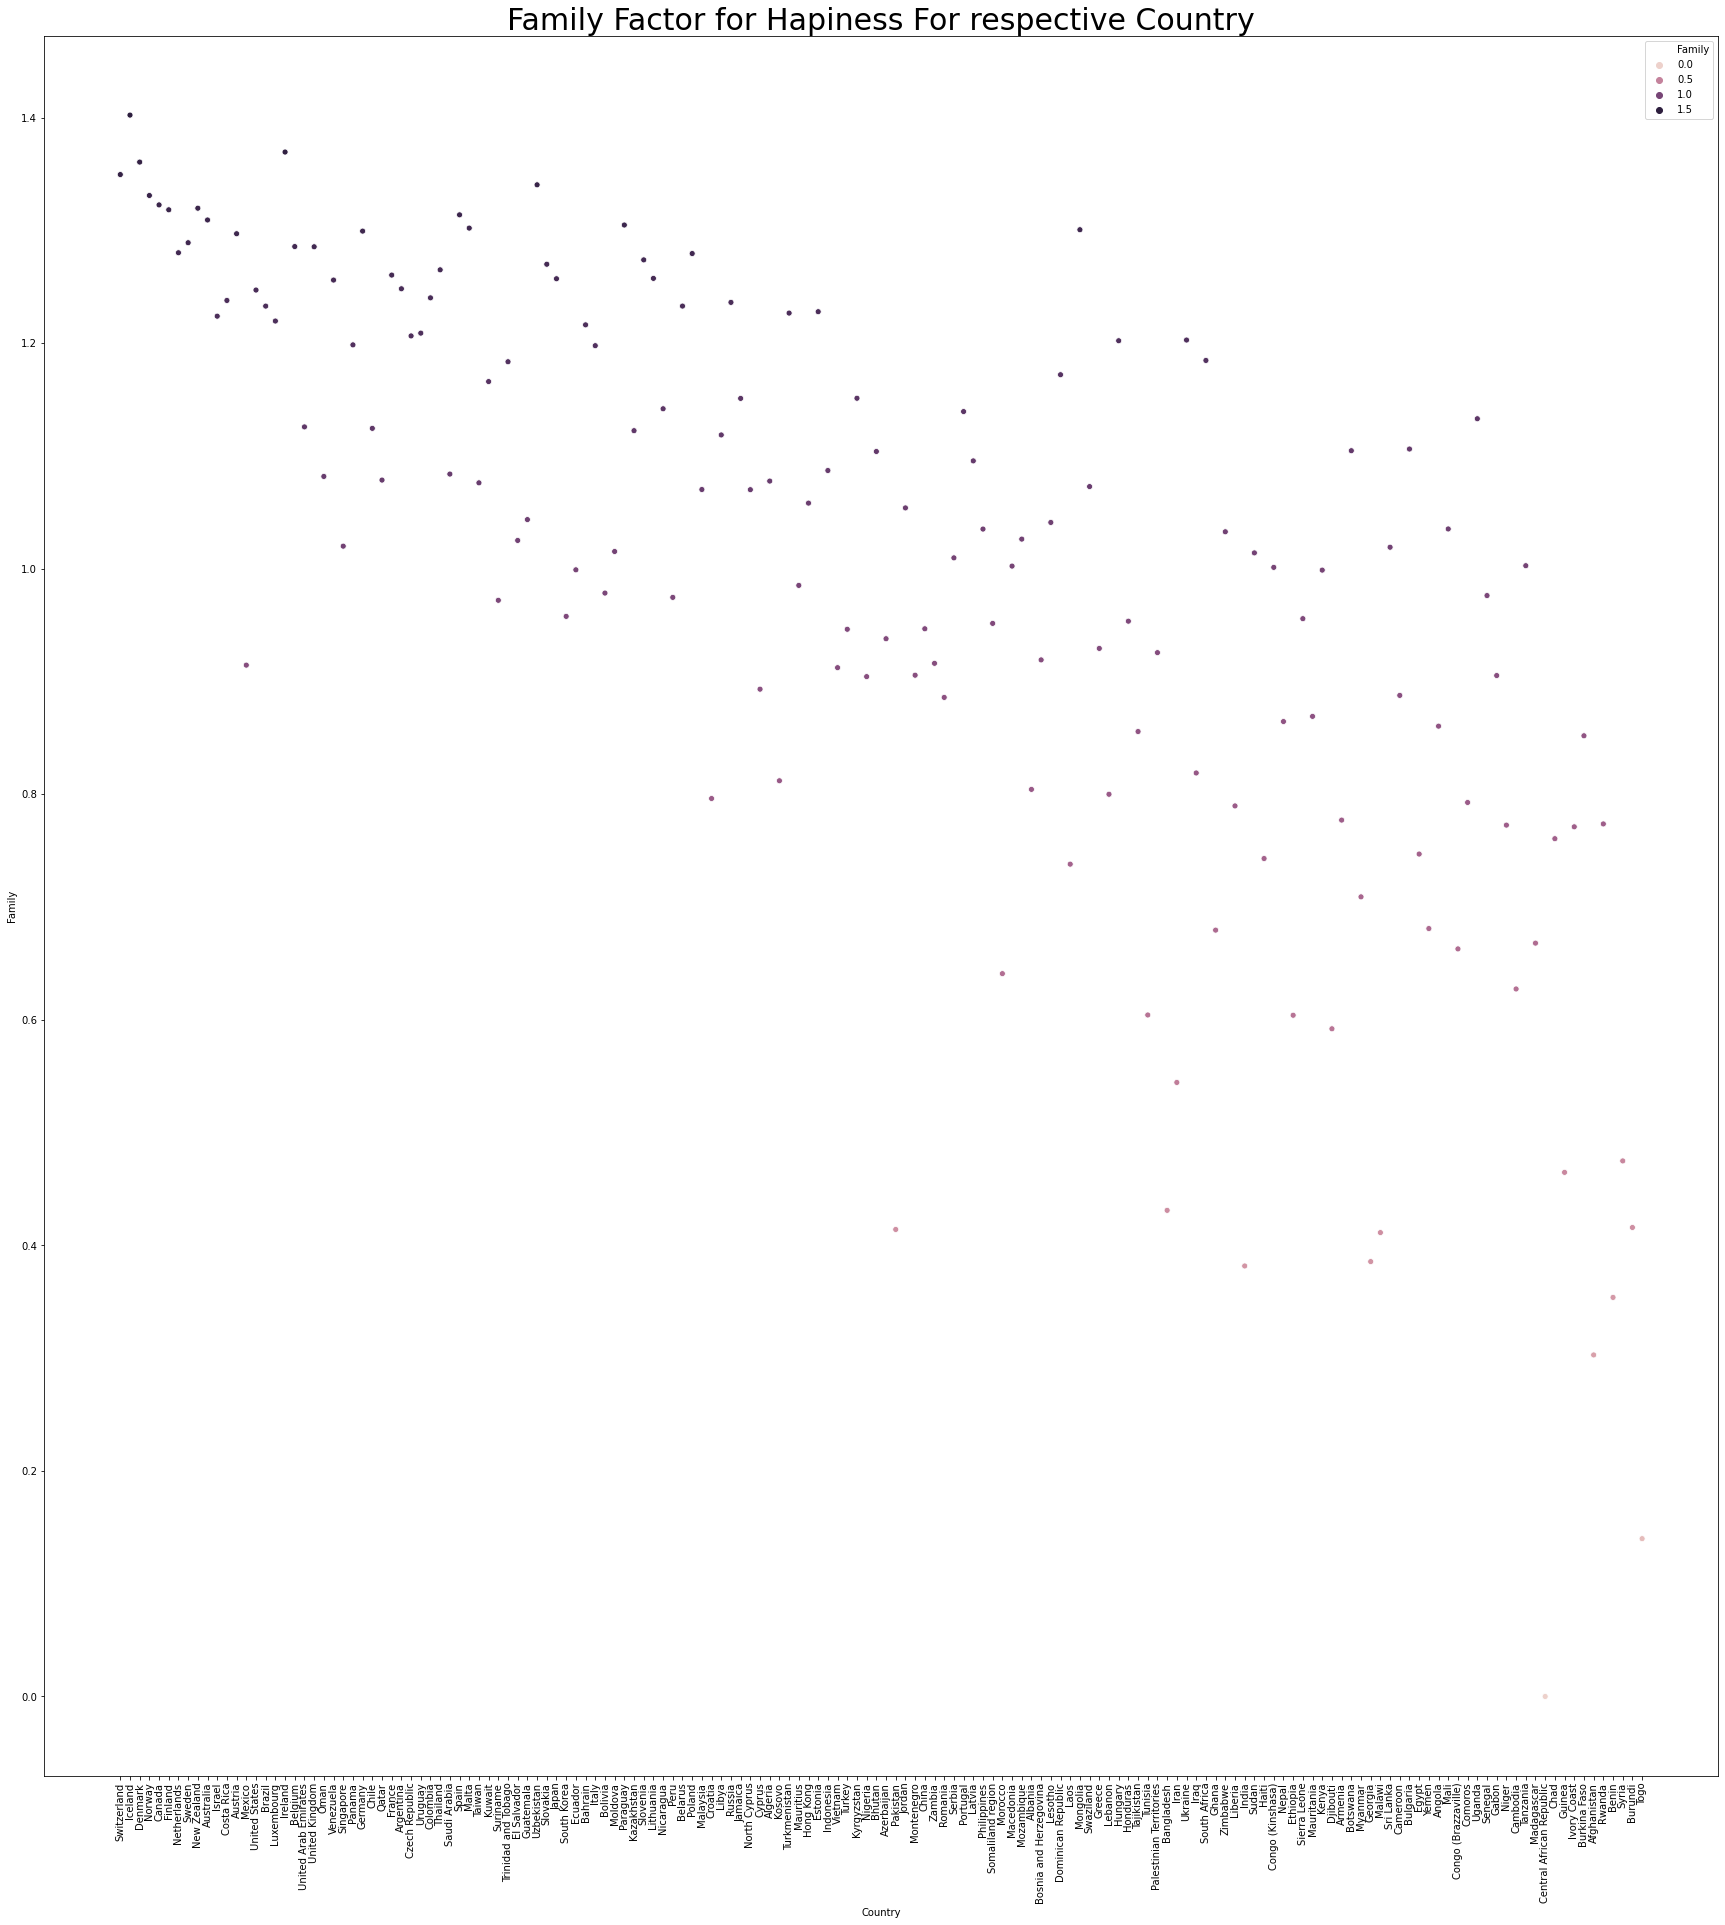

In [12]:
plt.figure(figsize=(30,32))
plt.xlabel('Country')
plt.ylabel('Family')
plt.title('Family Factor for Hapiness For respective Country',fontsize = 30)
sns.scatterplot(x='Country',y='Family',hue='Family',data=df)
plt.xticks(rotation=90)

In [13]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy_GDP per Capita,Family,Health_Life_Expectancy,Freedom,Trust Government_Corruption,Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy_GDP per Capita,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health_Life_Expectancy,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust Government_Corruption,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


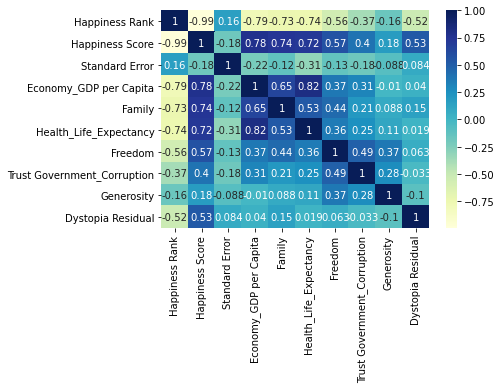

<Figure size 2160x1800 with 0 Axes>

In [14]:
sns.heatmap(df.corr(),vmax=1,cmap='YlGnBu',annot=True)
plt.figure(figsize=(30,25))
plt.show()

here we can see attriutes correlation of data df

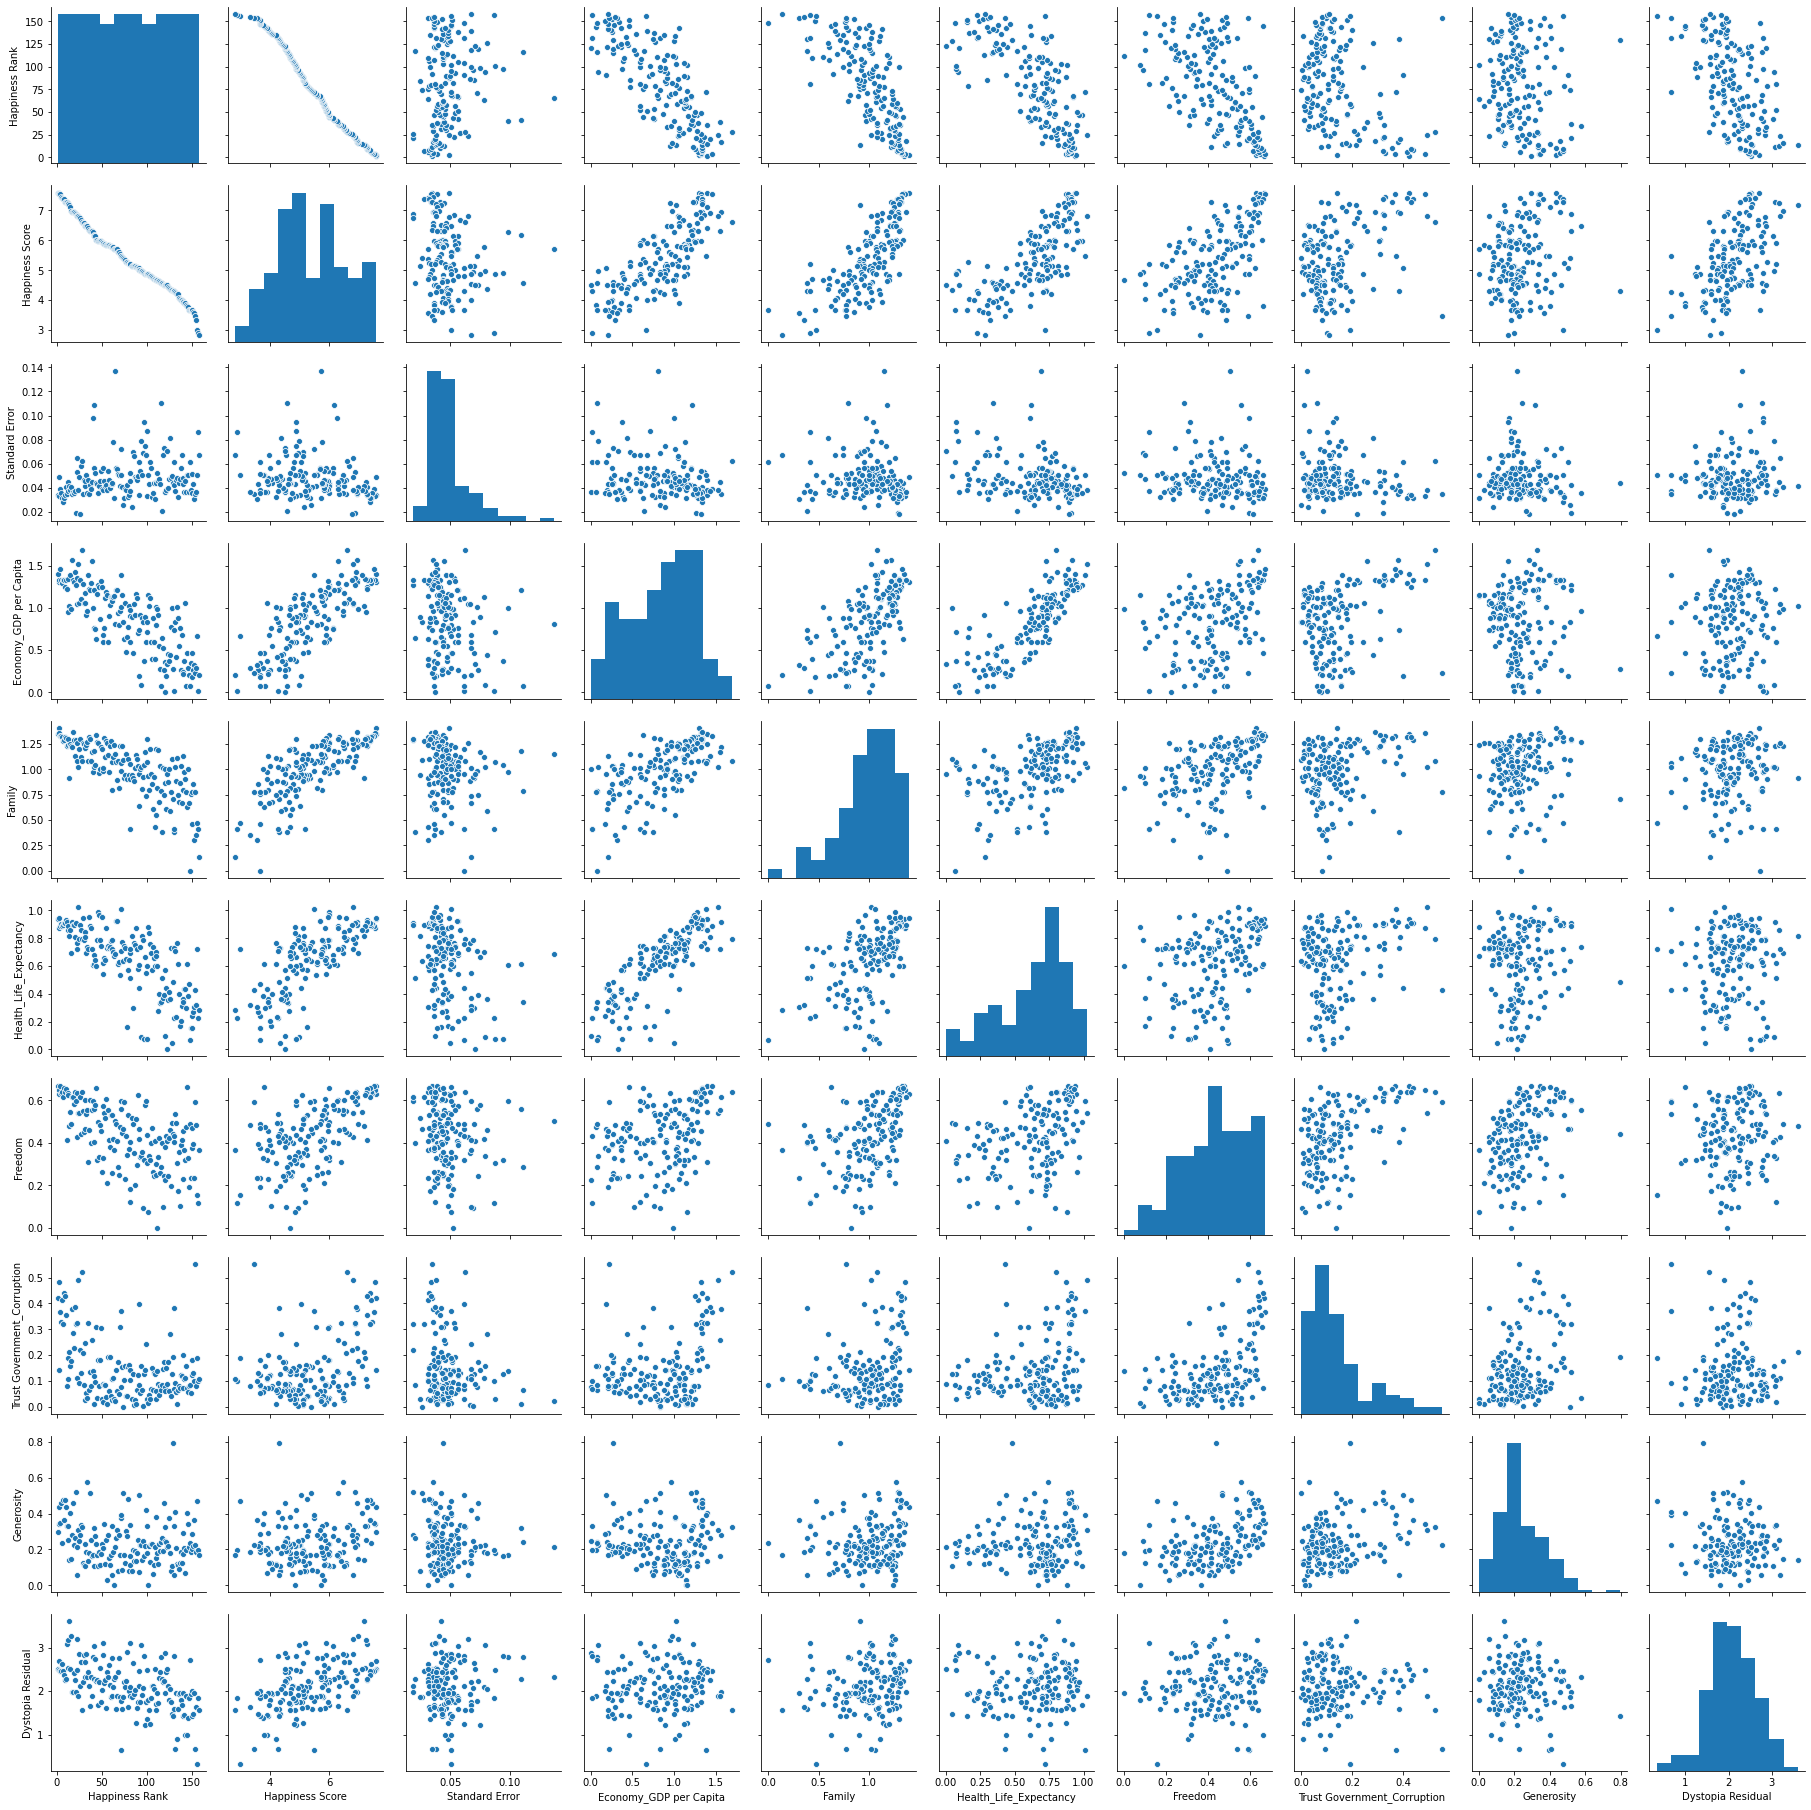

In [15]:
sns.pairplot(df)

In [16]:
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy_GDP per Capita,Family,Health_Life_Expectancy,Freedom,Trust Government_Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [17]:
label = LabelEncoder()

varib = ['Country','Region']
for i in varib:
    df[i]=label.fit_transform(df[i])

her we use label encoder to change value of attributes Country and Region

In [18]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy_GDP per Capita,Family,Health_Life_Expectancy,Freedom,Trust Government_Corruption,Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

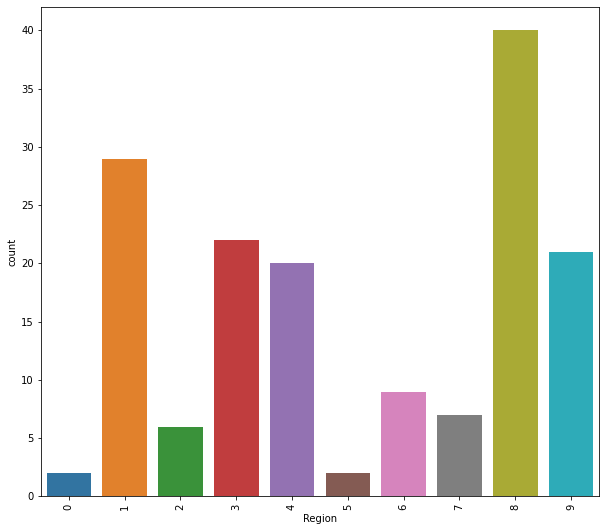

In [19]:
plt.figure(figsize=(10,9))
sns.countplot(df.Region)
plt.xticks(rotation=90)

this is repilica of above graph of Region but here we can see that region name hass been change with numbers

In [20]:
x = df.drop('Happiness Score', axis=1)
df['Happiness Score']= df['Happiness Score'].astype('category')
y = df['Happiness Score']

df.drop('Country', axis=1,inplace=True)

Here we Drop Country to get more acurate result because its creating string error and we also split data here for training and testing purpose

In [21]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=43)
y_test.shape

(48,)

In [22]:
x_test.shape

(48, 11)

In [23]:
x_train.shape

(110, 11)

In [24]:
y_train.shape

(110,)

In [25]:
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import explained_variance_score,r2_score,mean_tweedie_deviance
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

model=[Ridge(alpha=.4),LinearRegression(), Lasso(), DecisionTreeRegressor(max_depth=15,min_samples_leaf=100),RandomForestRegressor(n_estimators=500,max_depth=6,min_samples_leaf=50,n_jobs=4)]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(' Score = \n',m,'is :')
    print(explained_variance_score(y_test,predm))
    print(r2_score(y_test,predm))
    print(mean_tweedie_deviance(y_test,predm))
    print('\n')

 Score = 
 Ridge(alpha=0.4) is :
0.9941217860365746
0.9940421028111286
0.007967632187232341


 Score = 
 LinearRegression() is :
0.9999999393783242
0.9999999384694122
8.228626252696124e-08


 Score = 
 Lasso() is :
0.9800719283056385
0.9799368261923067
0.026830941243297223


 Score = 
 DecisionTreeRegressor(max_depth=15, min_samples_leaf=100) is :
-2.220446049250313e-16
-0.034970131015997774
1.3840892293526175


 Score = 
 RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_estimators=500,
                      n_jobs=4) is :
-2.220446049250313e-16
-0.03435149319177433
1.3832619108400175




Here we can clear see that Linear Regression is giving us more accurate result followed by Ridge